In [ ]:
import os
import zipfile
import numpy as np
import cv2 as cv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Path to the zip file
zip_path = '/content/drive/MyDrive/graduation model/politics_faces.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Path to the dataset folder
dataset_folder = '/content/dataset/politics_faces'

In [ ]:
data_folder='/content/dataset/Politics 101/Politics 101'

In [ ]:
AllSizes = []
import cv2
# Loop over the folders and images to check sizes
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    if os.path.isdir(folder_path):  # Ensure we are looking at folders
        for img in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img)
            if img_path.endswith(('.jpg', '.png', '.jpeg')):  # Check image extensions
                image = cv2.imread(img_path)
                if image is not None:  # Check if the image was read correctly
                    AllSizes.append(image.shape)  # Append the image size (height, width, channels)

# Get unique sizes
unique_sizes = set(AllSizes)
print(unique_sizes)

{(248, 180, 3), (169, 299, 3), (173, 292, 3), (258, 195, 3), (181, 279, 3), (195, 259, 3), (182, 277, 3), (185, 272, 3), (178, 282, 3), (189, 267, 3), (188, 268, 3), (262, 192, 3), (163, 310, 3), (155, 324, 3), (273, 185, 3), (171, 295, 3), (264, 191, 3), (268, 188, 3), (182, 278, 3), (600, 960, 3), (187, 270, 3), (466, 696, 3), (277, 182, 3), (194, 260, 3), (100, 100, 3), (224, 224, 3), (184, 274, 3), (266, 189, 3), (205, 246, 3), (585, 1045, 3), (162, 310, 3), (166, 303, 3), (163, 308, 3), (472, 840, 3), (254, 190, 3), (195, 258, 3), (179, 281, 3), (536, 948, 3), (174, 290, 3), (338, 602, 3), (202, 250, 3), (450, 800, 3), (185, 273, 3), (276, 183, 3), (270, 187, 3), (780, 1170, 3), (163, 309, 3), (253, 199, 3), (265, 190, 3), (168, 300, 3), (193, 262, 3), (159, 318, 3), (430, 750, 3), (176, 286, 3), (155, 325, 3), (285, 177, 3), (187, 269, 3), (216, 180, 3), (251, 200, 3), (263, 191, 3), (207, 243, 3), (194, 259, 3), (191, 264, 3), (165, 306, 3), (157, 320, 3), (576, 1024, 3), (176, 

In [ ]:
import os
import cv2
import numpy as np

# Define the path to your dataset folder
dataset_folder = '/content/dataset/Politics 101/Politics 101'

# Initialize lists to store the heights and widths of all images
heights = []
widths = []

# Loop over the folders and images to check sizes
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    if os.path.isdir(folder_path):  # Ensure we are looking at folders
        for img in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img)
            if img_path.endswith(('.jpg', '.png', '.jpeg')):  # Check image extensions
                image = cv2.imread(img_path)
                if image is not None:  # Check if the image was read correctly
                    height, width = image.shape[:2]  # Get the height and width
                    heights.append(height)
                    widths.append(width)

# Calculate the mean height and width
mean_height = np.mean(heights)
mean_width = np.mean(widths)

print(f'Mean Height: {mean_height}, Mean Width: {mean_width}')


Mean Height: 206.1824644549763, Mean Width: 295.9407582938389


In [ ]:
import os
import cv2


# Initialize lists to store the images and their corresponding labels
images = []
labels = []

# Loop through each class folder
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)

    if os.path.isdir(folder_path):  # Ensure it's a folder (class folder)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            if img_path.endswith(('.jpg', '.png', '.jpeg')):  # Only process image files
                image = cv2.imread(img_path)
                if image is not None:  # Ensure the image is loaded correctly
                    images.append(image)  # Add image to the list
                    labels.append(folder_name)  # Add label (folder name)

# Check the number of images and labels
print(f'Total Images: {len(images)}')
print(f'Total Labels: {len(labels)}')




Total Images: 422
Total Labels: 422


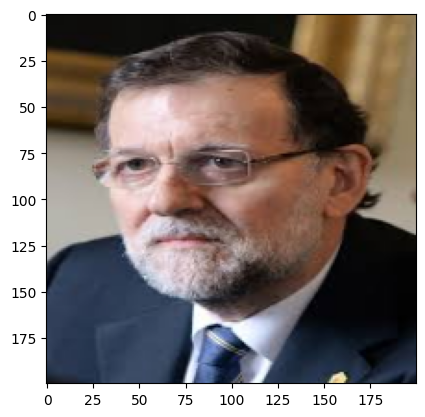

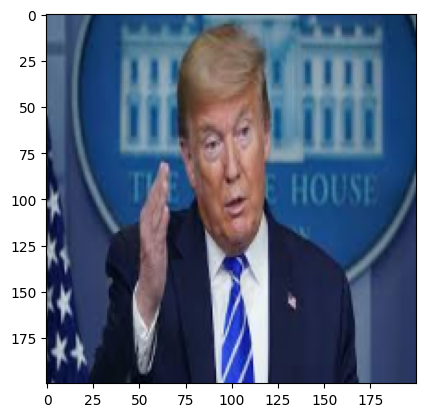

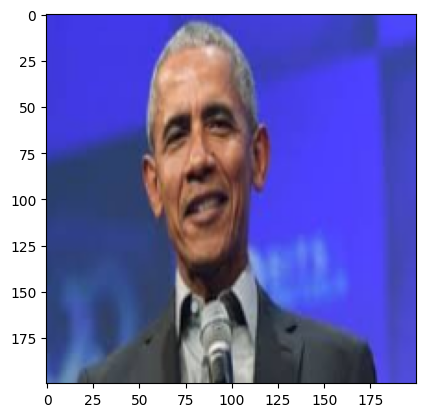

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np #Import numpy
import random #Import random

h = 200
w = 200


for i in range(3):
    # Choose a random image index from the list of images
    random_image_index = random.choice(range(len(images))) #Get a random index of the images list

    # Get the image at the random index
    img = images[random_image_index]

    # Convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image
    img = cv2.resize(img, (h, w))

    # Display the image
    plt.imshow(img)
    plt.show()

In [ ]:
#so i am setting the width and height to 200 colored

In [ ]:
h = 200
w = 200

for i in range(len(images)):
    images[i] = cv2.resize(images[i], (w, h))

In [ ]:

images = np.array(images)

# Normalize pixel values to the range [0, 1]
images = images / 255.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 90% training and 10% testing
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.1, random_state=32
)

In [ ]:
print(len(x_train))
print(len(x_test))


379
43
12


In [ ]:
model_path = '/content/model.keras'
checkpoint = ModelCheckpoint(
    filepath=model_path,
    monitor='val_accuracy',
    verbose=32,
    save_best_only=True
)
callbacks = [checkpoint]

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 is the number of  classes



model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


<ipython-input-33-2124cc34b297>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 599ms/step - accuracy: 0.2652 - loss: 2.5193 - val_accuracy: 0.6047 - val_loss: 1.3087
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7507 - loss: 0.8536 - val_accuracy: 0.7442 - val_loss: 0.9593
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9078 - loss: 0.3821 - val_accuracy: 0.6977 - val_loss: 1.1426
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9718 - loss: 0.2158 - val_accuracy: 0.9070 - val_loss: 0.5239
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9962 - loss: 0.0983 - val_accuracy: 0.8837 - val_loss: 0.4749
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0584 - val_accuracy: 0.8837 - val_loss: 0.4837
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0381 - val_accuracy: 0.8837 - val_loss: 0.4377
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0270 - val_accuracy: 0.8837 -